In [65]:
#data explorer
import numpy as np
import pandas as pd
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt

#url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22ANDYEAR%3A[1988&fields=STNAME%2CYEAR%2CINTINC%2CEINTEXP%2CNIM%2CNONII%2CNONIX%2CELNATR%2CITAXR%2CIGLSEC%2CITAX%2CEXTRA%2CNETINC&sort_by=YEAR&sort_order=DESC&limit=10&offset=0&format=json&download=false&filename=data_file"
url = "https://banks.data.fdic.gov/api/summary?filters=STNAME%3A%22{}%22&fields=STNAME%2CYEAR%2CINTINC%2CEINTEXP%2CNIM%2CNONII%2CNONIX%2CELNATR%2CITAXR%2CIGLSEC%2CITAX%2CEXTRA%2CNETINC&sort_by=YEAR&sort_order=DESC&limit=24&offset=0&format=json&download=false&filename=data_file"
summary_by_year = {}

In [2]:
# List of the states
state_list = ["Alabama","Alaska","Arizona","Arkansas","California","Colorado",
  "Connecticut","Delaware","Florida","Georgia","Hawaii","Idaho","Illinois",
  "Indiana","Iowa","Kansas","Kentucky","Louisiana","Maine","Maryland",
  "Massachusetts","Michigan","Minnesota","Mississippi","Missouri","Montana",
  "Nebraska","Nevada","New Hampshire","New Jersey","New Mexico","New York",
  "North Carolina","North Dakota","Ohio","Oklahoma","Oregon","Pennsylvania",
  "Rhode Island","South Carolina","South Dakota","Tennessee","Texas","Utah",
  "Vermont","Virginia","Washington","West Virginia","Wisconsin","Wyoming"]

year_list = []
for i in range(25):
    year_list.append(1988 + i)

# Loop to add each state's data to dictionary 
for state in state_list:
    url_state = url.format(state)
    summary_by_year.update({state: requests.get(url_state).json()})
#print(summary_by_year.keys())


In [3]:
summary_by_year['Alabama']
#pprint(summary_by_year['Alabama']['data'][0]['data'])

{'data': [{'data': {'EINTEXP': 919157,
    'ELNATR': 526215,
    'EXTRA': 0,
    'IGLSEC': 26973,
    'INTINC': 8597659,
    'ITAX': 1221536,
    'ITAXR': 3510133,
    'NETINC': 2311678,
    'NIM': 7678502,
    'NONII': 3085435,
    'NONIX': 6727589,
    'STNAME': 'Alabama',
    'YEAR': '2017'}},
  {'data': {'EINTEXP': 3922,
    'ELNATR': 47,
    'EXTRA': 0,
    'IGLSEC': 19,
    'INTINC': 21221,
    'ITAX': 1828,
    'ITAXR': 4809,
    'NETINC': 3000,
    'NIM': 17299,
    'NONII': 12093,
    'NONIX': 24536,
    'STNAME': 'Alabama',
    'YEAR': '2017'}},
  {'data': {'EINTEXP': 3805,
    'ELNATR': 306,
    'EXTRA': 0,
    'IGLSEC': 80,
    'INTINC': 20651,
    'ITAX': 1500,
    'ITAXR': 4989,
    'NETINC': 3569,
    'NIM': 16846,
    'NONII': 12712,
    'NONIX': 24263,
    'STNAME': 'Alabama',
    'YEAR': '2016'}},
  {'data': {'EINTEXP': 842847,
    'ELNATR': 670092,
    'EXTRA': 0,
    'IGLSEC': 52486,
    'INTINC': 7994518,
    'ITAX': 861640,
    'ITAXR': 2945067,
    'NETINC': 2132

In [70]:
columns = list(summary_by_year['Alabama']['data'][0]['data'].keys())

KeyError: 'data'

In [76]:
for y, s in zip(year_list, state_list):
    print(y, s)

1988 Alabama
1989 Alaska
1990 Arizona
1991 Arkansas
1992 California
1993 Colorado
1994 Connecticut
1995 Delaware
1996 Florida
1997 Georgia
1998 Hawaii
1999 Idaho
2000 Illinois
2001 Indiana
2002 Iowa
2003 Kansas
2004 Kentucky
2005 Louisiana
2006 Maine
2007 Maryland
2008 Massachusetts
2009 Michigan
2010 Minnesota
2011 Mississippi
2012 Missouri


In [23]:
debt_data = "../raw-data/fdicdata.csv"
debt = pd.read_csv(debt_data)

Index(['Unnamed: 0', 'Auto Loans', 'Total Loans', 'Other Loans',
       'Credit Cards', 'Real Estate', 'State', 'Total Past Due', 'Year'],
      dtype='object')

In [66]:
debt_clean = debt.drop(columns = ['Unnamed: 0','Auto Loans'])
debt_clean.sort_values('Year')

,Total Loans,Other Loans,Credit Cards,Real Estate,State,Total Past Due,Year
1247,14262846,999634,13263212,966880,South Dakota,1229993,1988
1218,5352996,4838061,514935,15345777,Missouri,633724,1988
1217,7725882,5628900,2096982,30840380,Massachusetts,1450129,1988
1216,5196911,4947334,249577,8515967,Kentucky,487742,1988
1215,2349949,2080067,269882,5024181,Kansas,205320,1988
1214,1915829,1709181,206648,4582175,Arkansas,241578,1988
1213,2554536,2432031,122505,4255781,West Virginia,313447,1988
1212,571000,488998,82002,2517061,Vermont,95021,1988
1211,6384705,5532893,851812,10980255,Tennessee,562115,1988
1210,1195247,995287,199960,2649034,New Mexico,217861,1988


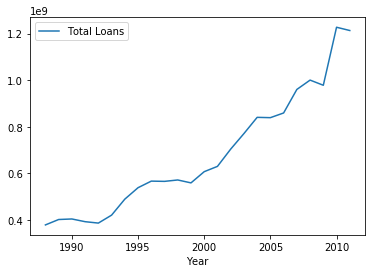

In [222]:
debt_clean_all_years = debt_clean.groupby('Year').sum().reset_index()
debt_clean_all_years.plot(x='Year', y='Total Loans')

In [82]:
debt_clean_first_rec = debt_clean[(debt_clean['Year'] == 1988) | (debt_clean['Year'] == 1989) | (debt_clean['Year'] == 1990) | 
          (debt_clean['Year'] == 1991) | (debt_clean['Year'] == 1992) | (debt_clean['Year'] == 1993)]

debt_clean_second_rec = debt_clean[(debt_clean['Year'] == 1998) | (debt_clean['Year'] == 1999) | (debt_clean['Year'] == 2000) | 
          (debt_clean['Year'] == 2001) | (debt_clean['Year'] == 2002) | (debt_clean['Year'] == 2003)]

debt_clean_third_rec = debt_clean[(debt_clean['Year'] == 2006) | (debt_clean['Year'] == 2007) | (debt_clean['Year'] == 2008) | 
          (debt_clean['Year'] == 2009) | (debt_clean['Year'] == 2010) | (debt_clean['Year'] == 2011)]


In [100]:
debt_clean_first_rec_tot = debt_clean_first_rec.groupby('Year').sum().reset_index()
debt_clean_second_rec_tot = debt_clean_second_rec.groupby('Year').sum().reset_index()
debt_clean_third_rec_tot = debt_clean_third_rec.groupby('Year').sum().reset_index()

6

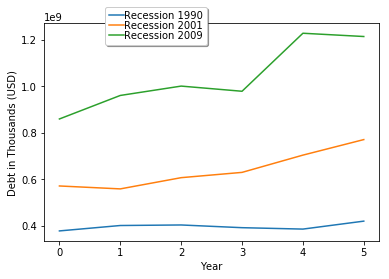

In [156]:
plt.plot(debt_clean_first_rec_tot['Total Loans'])
plt.plot(debt_clean_second_rec_tot['Total Loans'])
plt.plot(debt_clean_third_rec_tot['Total Loans'])
plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.show()

Text(0, 0.5, 'Debt in Thousands')

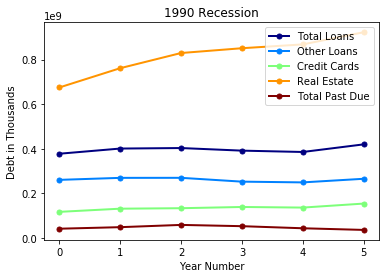

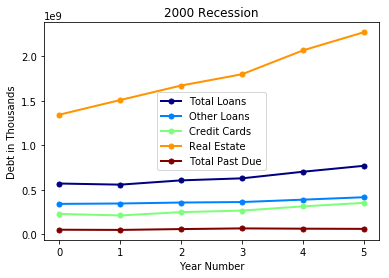

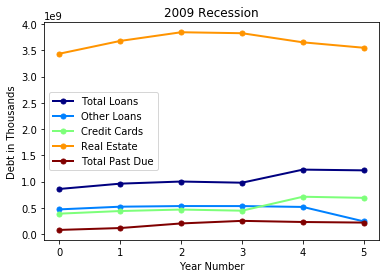

In [126]:
debt_clean_first_rec_tot_plot = debt_clean_first_rec_tot.drop(columns = ['Year'])
ax = debt_clean_first_rec_tot_plot.plot(lw=2, colormap='jet', marker='.', markersize=10, title='1990 Recession')
ax.set_xlabel("Year Number")
ax.set_ylabel("Debt in Thousands")

debt_clean_second_rec_tot_plot = debt_clean_second_rec_tot.drop(columns = ['Year'])
ax2 = debt_clean_second_rec_tot_plot.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2000 Recession')
ax2.set_xlabel("Year Number")
ax2.set_ylabel("Debt in Thousands")


debt_clean_third_rec_tot_plot = debt_clean_third_rec_tot.drop(columns = ['Year'])
ax3 = debt_clean_third_rec_tot_plot.plot(lw=2, colormap='jet', marker='.', markersize=10, title='2009 Recession')
ax3.set_xlabel("Year Number")
ax3.set_ylabel("Debt in Thousands")

#debt_clean_first_rec_tot.plot(x='Year', y='Total Loans', kind = 'line')
#debt_clean_second_rec_tot.plot(x='Year', y='Total Loans')
#debt_clean_third_rec_tot.plot(x='Year', y='Total Loans')

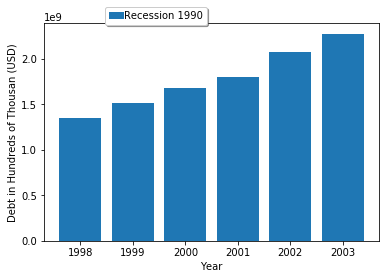

In [142]:
#plt.bar(debt_clean_first_rec_tot['Year'],debt_clean_first_rec_tot['Total Loans'])
plt.bar(debt_clean_second_rec_tot['Year'],debt_clean_second_rec_tot['Real Estate'])
#plt.bar(debt_clean_second_rec_tot['Year'],debt_clean_third_rec_tot['Real Estate'])
plt.legend(['Recession 1990', 'Recession 2001', 'Recession 2009'], loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.show()

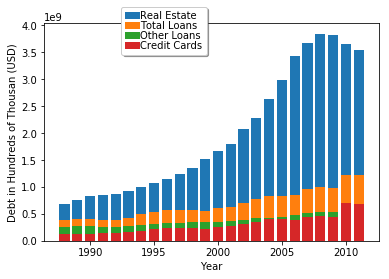

In [155]:
plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Real Estate'])
plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Total Loans'])
plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Credit Cards'])
#plt.bar(debt_clean_all_years['Year'],debt_clean_all_years['Other Loans'])
plt.legend(['Real Estate', 'Total Loans', 'Other Loans', 'Credit Cards'], loc='best', 
           bbox_to_anchor=[0.5, 1.1], 
           columnspacing=1.0, labelspacing=0.0,
           handletextpad=0.0, handlelength=1.5,
           fancybox=True, shadow=True)
plt.xlabel('Year')
plt.ylabel('Debt in Thousands (USD)')
plt.show()

In [223]:
debt_clean_all_years_test = debt_clean_all_years
per = debt_clean_all_years['Total Loans']
pers = []
for i in range(1,len(per)):
    delta = ((per[i]/per[i-1]) -1) * 100
    pers.append(delta)

In [279]:
per[0],per[1]
((per[1]/per[0]) - 1) *100
store = list(debt_clean_all_years.keys())
store.pop(0)
#print(store)
a_df = pd.DataFrame()
count = 0
for head in store:
    perc = debt_clean_all_years[head]
    a_df[head] = percs
    percs = []
    for i in range(1,len(perc)):
        delta = ((perc[i]/perc[i-1]) -1)
        percs.append(delta)
        

   


#pd.concat([pd.DataFrame[j], columns = [head] for j in range(len(store))], ignore_index=True)

#pd.concat([pd.DataFrame([i], columns=['A']) for i in range(5)], ignore_index=True)

,Total Loans,Other Loans,Credit Cards,Real Estate,Total Past Due
0,16.608290,0.061449,0.034528,0.121324,0.128165
1,20.897396,0.005746,0.000638,0.016228,0.089417
2,-9.728329,-0.028860,-0.063538,0.041202,0.025895
3,-17.655566,-0.015393,-0.013274,-0.019243,0.020113
4,-16.976773,0.088506,0.065002,0.131477,0.062841
5,-3.683877,0.163662,0.130768,0.220265,0.080977
6,20.128760,0.100583,0.063206,0.160184,0.082601
7,14.990126,0.052507,0.035367,0.077554,0.054534
8,2.254023,-0.001885,-0.001190,-0.002862,0.093034
9,4.321811,0.010638,0.035817,-0.024774,0.080807


In [266]:
def percentage_delta(header):
    empty_df = pd.DataFrame
    for head in header:
        perc = debt_clean_all_years[head]
        percs = []
        for i in range(1,len(per)):
            delta = ((perc[i]/perc[i-1]) -1) * 100
            percs.append(delta)
            empty_df.append({head: percs})

In [267]:
percentage_delta(store)

TypeError: append() missing 1 required positional argument: 'other'